# CAR PRICE PREDICTION WITH MACHINE LEARNING



### The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage it gives and many more. Car price prediction is one of the major research areas in machine learning. So if you want to learn how to train a car price prediction model then this project is for you.

## 1. Importing the Library:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle

In [2]:
import scipy.stats as stats
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

## 2. Reading the Dataset:

In [3]:
df = pd.read_excel("car price.xlsx")

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

## 3. Exploratory Data Analysis:

In [6]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df.dtypes.value_counts()

object     10
int64       8
float64     8
dtype: int64

- There are 26 columns. Of which 8 are int64 and float64.

- Then there are 10 columns of Object type.

### Checking the null values in the dataset:

In [10]:
# Checking the null values in the dataset:

df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

## BIVARIATE ANALYSIS:

<AxesSubplot:xlabel='price', ylabel='CarName'>

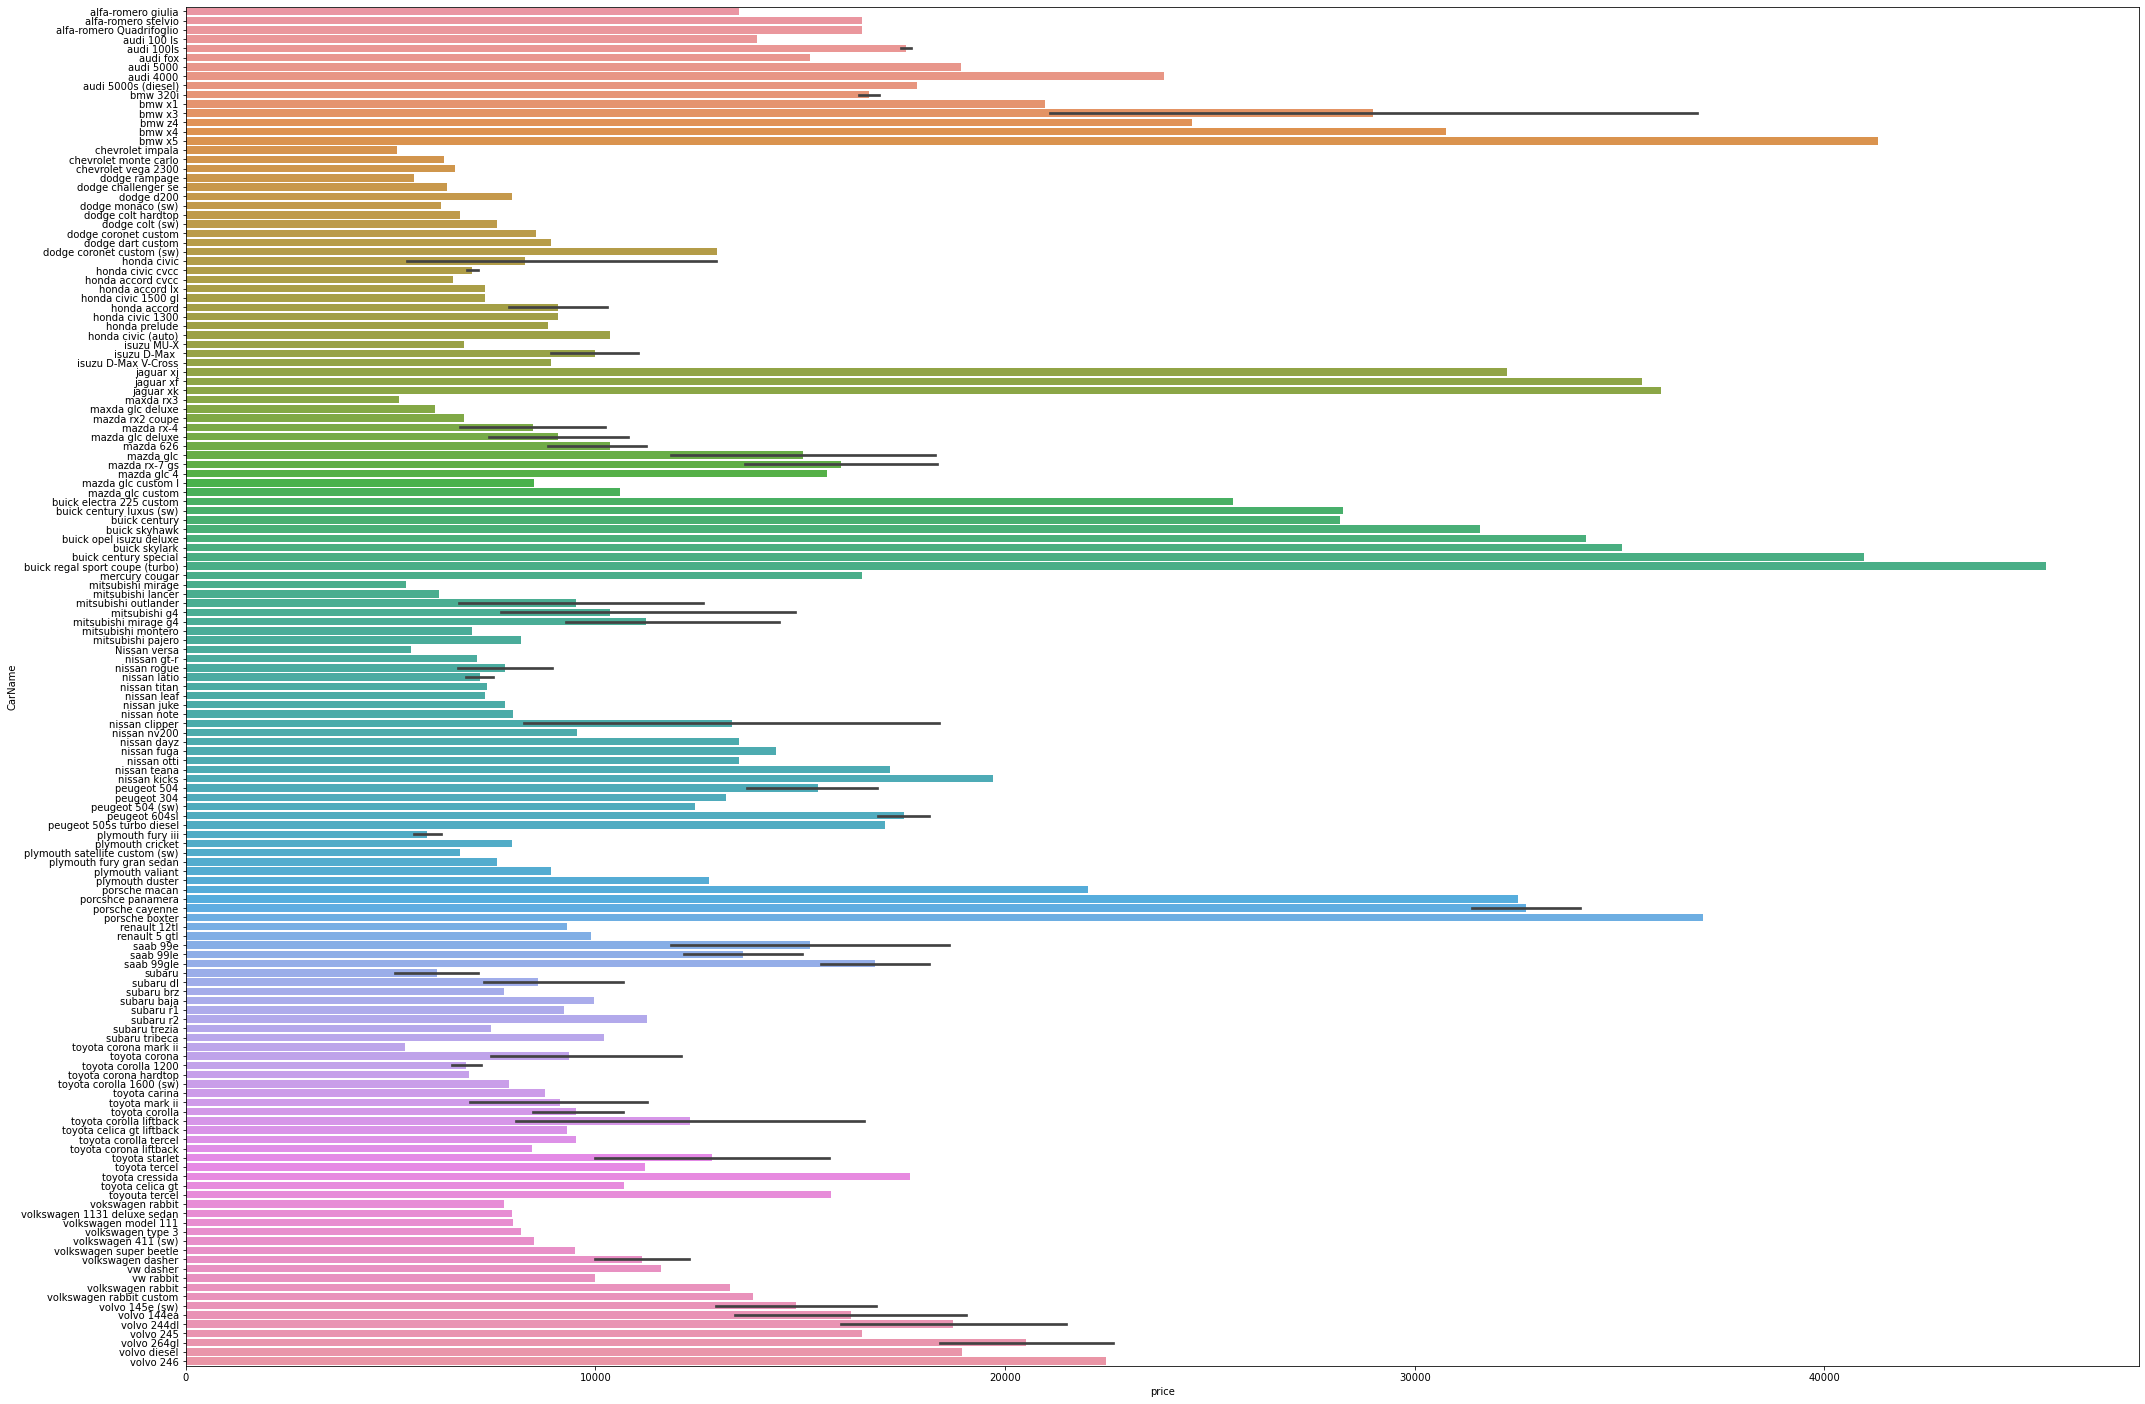

In [14]:
plt.figure(figsize=(35,25))

sns.barplot(x='price',y='CarName',data=df,orient='h')

<AxesSubplot:xlabel='price', ylabel='horsepower'>

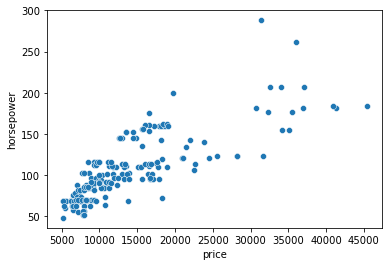

In [15]:
sns.scatterplot(data=df, x="price", y="horsepower")

## MULTIVARIATE ANALYSIS:

- The price of a car depends on a lot of factors like the goodwill of the brand of the car, features of the car, horsepower and the mileage 

In [16]:
df.corr()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
car_ID,1.000000,-0.151621,0.129729,0.170636,0.052387,0.255960,0.071962,-0.033930,0.260064,-0.160824,0.150276,-0.015006,-0.203789,0.015940,0.011255,-0.109093
symboling,-0.151621,1.000000,-0.531954,-0.357612,-0.232919,-0.541038,-0.227691,-0.105790,-0.130051,-0.008735,-0.178515,0.070873,0.273606,-0.035823,0.034606,-0.079978
wheelbase,0.129729,-0.531954,1.000000,0.874587,0.795144,0.589435,0.776386,0.569329,0.488750,0.160959,0.249786,0.353294,-0.360469,-0.470414,-0.544082,0.577816
carlength,0.170636,-0.357612,0.874587,1.000000,0.841118,0.491029,0.877728,0.683360,0.606454,0.129533,0.158414,0.552623,-0.287242,-0.670909,-0.704662,0.682920
carwidth,0.052387,-0.232919,0.795144,0.841118,1.000000,0.279210,0.867032,0.735433,0.559150,0.182942,0.181129,0.640732,-0.220012,-0.642704,-0.677218,0.759325
carheight,0.255960,-0.541038,0.589435,0.491029,0.279210,1.000000,0.295572,0.067149,0.171071,-0.055307,0.261214,-0.108802,-0.320411,-0.048640,-0.107358,0.119336
curbweight,0.071962,-0.227691,0.776386,0.877728,0.867032,0.295572,1.000000,0.850594,0.648480,0.168790,0.151362,0.750739,-0.266243,-0.757414,-0.797465,0.835305
enginesize,-0.033930,-0.105790,0.569329,0.683360,0.735433,0.067149,0.850594,1.000000,0.583774,0.203129,0.028971,0.809769,-0.244660,-0.653658,-0.677470,0.874145
boreratio,0.260064,-0.130051,0.488750,0.606454,0.559150,0.171071,0.648480,0.583774,1.000000,-0.055909,0.005197,0.573677,-0.254976,-0.584532,-0.587012,0.553173
stroke,-0.160824,-0.008735,0.160959,0.129533,0.182942,-0.055307,0.168790,0.203129,-0.055909,1.000000,0.186110,0.080940,-0.067964,-0.042145,-0.043931,0.079443


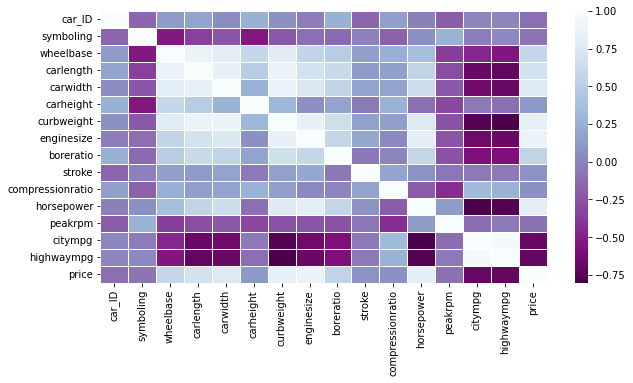

In [19]:
plt.figure(figsize=(10,5))

sns.heatmap(df.corr(),linewidths='.5',fmt='.1f',cmap='BuPu_r')

plt.show()

From the heatmap, we can note that price of a car depends on:

1. Horsepower

2. EngineSize, Carwidth, Curbweight.

In [20]:
df=df.drop(columns=["car_ID",'CarName','enginetype','cylindernumber','fueltype','aspiration','fuelsystem','doornumber','carbody','drivewheel','enginelocation'])
df

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,13495.0
1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,9.0,111,5000,21,27,16500.0
2,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,9.0,154,5000,19,26,16500.0
3,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,10.0,102,5500,24,30,13950.0
4,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,9.5,114,5400,23,28,16845.0
201,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,8.7,160,5300,19,25,19045.0
202,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,8.8,134,5500,18,23,21485.0
203,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,23.0,106,4800,26,27,22470.0


In [21]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from scipy.stats import zscore

# 4. DATA MODELING:


## Splitting the Dataset into Train and Test:

In [22]:
X = df.drop(columns='price')
#X is an indeoendent variable.

y = df['price']
# is the target variable.

In [23]:
X.describe()

,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220
std,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443
min,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000
25%,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000
50%,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000
75%,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000
max,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000


In [24]:
X_Scaled = X.apply(zscore)
X_Scaled.describe().T

,count,mean,std,min,25%,50%,75%,max
symboling,205.0,5.848980e-17,1.002448,-2.281433,-0.671472,0.133509,0.938490,1.743470
wheelbase,205.0,-1.496906e-15,1.002448,-2.023713,-0.708596,-0.292420,0.606521,3.686225
carlength,205.0,3.730349e-15,1.002448,-2.677244,-0.629655,-0.069006,0.735404,2.766741
carwidth,205.0,9.964929e-16,1.002448,-2.620512,-0.844782,-0.190566,0.463650,2.987056
carheight,205.0,-4.408398e-16,1.002448,-2.430664,-0.707626,0.153893,0.728239,2.492302
curbweight,205.0,9.910771e-17,1.002448,-2.055348,-0.790449,-0.272552,0.730512,2.907988
enginesize,205.0,5.415722e-19,1.002448,-1.586561,-0.719947,-0.166277,0.339248,4.792679
boreratio,205.0,2.267021e-15,1.002448,-2.923049,-0.665314,-0.073121,0.926204,2.258638
stroke,205.0,2.126483e-15,1.002448,-3.789311,-0.464834,0.110556,0.494149,2.923575
compressionratio,205.0,-3.115394e-16,1.002448,-0.793101,-0.389299,-0.288349,-0.187398,3.244916


In [25]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score as r

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X_Scaled,y,test_size = 0.3,random_state=10)

In [27]:
# Checking the Dimensions of Training and Testing Data
print("The Shape of X_train dataset:", X_train.shape)
print("The Shape of X_Test dataset:", X_test.shape)
print("The Shape of Y_Train dataset:", y_train.shape)
print("The Shape of Y_Test dataset:", y_test.shape)

The Shape of X_train dataset: (143, 14)
The Shape of X_Test dataset: (62, 14)
The Shape of Y_Train dataset: (143,)
The Shape of Y_Test dataset: (62,)


In [28]:
model1 = LinearRegression()

In [29]:
model1.fit(X_train, y_train)

LinearRegression()

In [30]:
pred = model1.predict(X_test)
pred

array([ 9642.38945171, 18639.14831461, 12517.20066092,  5151.39316644,
       52367.87770667, 10362.74542601,  6570.04966555, 13957.29612763,
        5935.09420173, 19770.96643813, 14856.19041781,  9416.62923952,
       10064.74167892, 16857.11490795, 39304.25677074, 24245.10121952,
        9713.13753944, 17603.39724058, 12743.31184675, 20178.70110315,
        7970.47895627, 12506.00346065, 13778.24724363, 22527.61001387,
       17119.01214213, 19617.33121924, 11343.82077685,  6578.85531282,
        9978.21489906, 24606.88672677,  6342.97793267,  6857.38046522,
        6352.39855321,  9177.17590424, 24624.03562634, 25047.4189702 ,
        9646.10078019, 24415.96252867, 11094.01387253,  5962.62729044,
        9443.88779153,  7773.2382609 ,  6408.58125569, 30361.26520633,
       32807.78686963,  6588.98458577, 15266.88130325, 16800.51899634,
        8435.11895876, 15160.89259606, 11709.25708404, 17423.47323838,
       17232.20396534,  6293.09824042,  5151.39316644, 23492.49952509,
      

In [31]:
print('Accuracy of the Model is:',r(y_test,pred)*100)

Accuracy of the Model is: 70.88912505346386


# THE END